## Importing important library

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data 

In [202]:
#Loading Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Stroke prediction\healthcare-dataset-stroke-data.csv')
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2847,2393,Male,59.0,1,0,Yes,Private,Rural,87.81,29.8,formerly smoked,0
2868,59454,Female,79.0,0,0,Yes,Self-employed,Urban,74.35,28.5,formerly smoked,0
3551,20421,Female,43.0,0,0,Yes,Private,Rural,68.94,26.8,never smoked,0
3229,52080,Female,26.0,0,0,No,Private,Rural,85.27,24.6,never smoked,0
431,3655,Male,31.0,0,0,Yes,Govt_job,Rural,91.65,24.6,formerly smoked,0


## Data Preparation

In [21]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [22]:
df.shape

(5110, 11)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [31]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [203]:
#Filling the null values
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [33]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [35]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [36]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [37]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

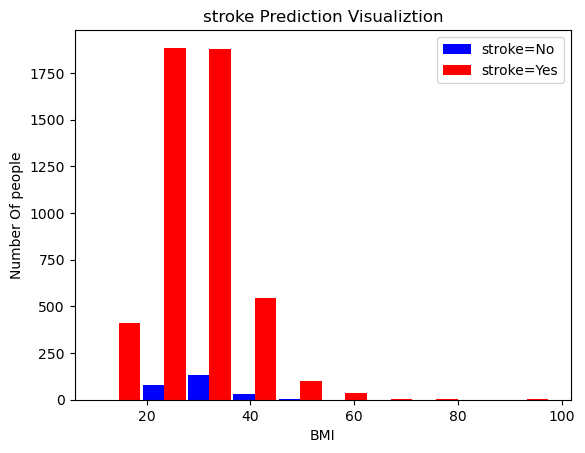

In [67]:
#Data Visualization
bmi_stroke_no = df[df.stroke==0].bmi
bmi_stroke_yes = df[df.stroke==1].bmi

plt.xlabel("BMI")
plt.ylabel("Number Of people")
plt.title("stroke Prediction Visualiztion")


plt.hist([bmi_stroke_yes ,bmi_stroke_no], rwidth=0.95, color=['blue','red'] ,label=['stroke=No','stroke=Yes'])
plt.legend()

(array([[ 183.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           66.],
        [4429.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          432.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

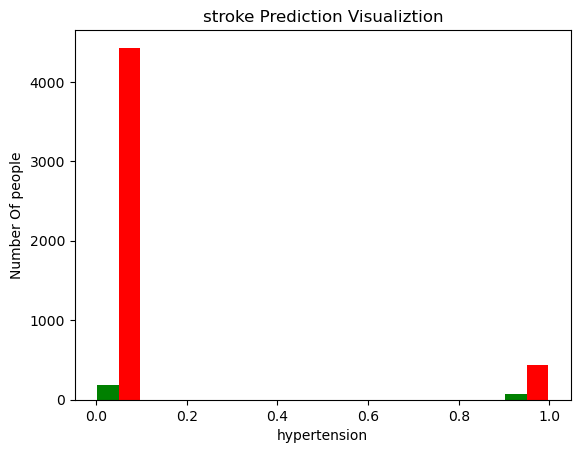

In [69]:
ht_stroke_no = df[df.stroke==0].hypertension
ht_stroke_yes = df[df.stroke==1].hypertension

plt.xlabel("hypertension")
plt.ylabel("Number Of people")
plt.title("stroke Prediction Visualiztion")



plt.hist([ht_stroke_yes ,ht_stroke_no], rwidth=0.95, color=['green','red'] ,label=['stroke=No','stroke=Yes'])

In [74]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [75]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [77]:
yes_no_columns = ['ever_married']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [78]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [81]:
#Hot encoding
df2 = pd.get_dummies(data=df, columns=['gender','work_type','Residence_type','smoking_status'])
df2.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [82]:
df2.sample(5)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1911,59.0,0,0,1,67.75,21.3,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1809,13.0,0,0,0,99.44,21.0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3602,49.0,0,0,0,104.08,26.6,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
778,63.0,0,0,1,92.70,29.5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2433,78.0,1,1,0,92.90,30.4,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [83]:
df2.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

## Feature Scailing 

In [85]:
cols_to_scale = ['age','avg_glucose_level','bmi']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [86]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

age: [8.16894531e-01 7.43652344e-01 9.75585938e-01 5.97167969e-01
 9.63378906e-01 9.87792969e-01 9.02343750e-01 8.41308594e-01
 7.19238281e-01 9.51171875e-01 6.58203125e-01 6.09375000e-01
 7.80273438e-01 9.14550781e-01 7.31445312e-01 6.94824219e-01
 8.65722656e-01 6.33789062e-01 1.00000000e+00 7.92480469e-01
 7.07031250e-01 5.11718750e-01 5.84960938e-01 8.77929688e-01
 7.68066406e-01 9.26757812e-01 4.75097656e-01 9.38964844e-01
 8.90136719e-01 6.82617188e-01 5.48339844e-01 8.53515625e-01
 8.04687500e-01 6.21582031e-01 5.23925781e-01 8.29101562e-01
 5.72753906e-01 6.45996094e-01 4.62890625e-01 6.70410156e-01
 1.51367188e-02 5.60546875e-01 3.89648438e-01 1.69921875e-01
 3.56445312e-02 9.66796875e-02 4.50683594e-01 4.87304688e-01
 4.26269531e-01 2.43164062e-01 5.36132812e-01 3.04199219e-01
 3.28613281e-01 2.79785156e-01 2.06542969e-01 1.57714844e-01
 4.78515625e-02 1.94335938e-01 2.67578125e-01 3.65234375e-01
 3.53027344e-01 1.33300781e-01 2.55371094e-01 2.18750000e-01
 4.01855469e-01 2.9

In [89]:
X = df2.drop('stroke',axis='columns')
y = df2['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [90]:
X_train.shape

(4088, 20)

In [91]:
X_test.shape

(1022, 20)

In [92]:
X_train[:10]

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2257,0.865723,0,0,1,0.857215,0.195876,1,0,0,0,0,1,0,0,0,1,0,0,1,0
5043,0.462891,0,0,0,0.264380,0.183276,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4032,0.963379,0,0,1,0.075432,0.264605,1,0,0,0,0,1,0,0,0,1,1,0,0,0
4330,0.658203,0,0,1,0.070677,0.120275,1,0,0,0,0,0,1,0,0,1,0,0,0,1
982,0.009766,0,0,0,0.472948,0.101947,0,1,0,0,0,0,0,1,1,0,1,0,0,0
3931,0.890137,1,0,0,0.660973,0.504009,1,0,0,0,0,0,1,0,1,0,0,1,0,0
5094,0.157715,0,0,0,0.125842,0.160367,0,1,0,0,0,0,0,1,0,1,1,0,0,0
2713,0.389648,0,0,1,0.280399,0.263459,0,1,0,0,0,1,0,0,1,0,0,0,1,0
818,0.243164,0,0,0,0.239359,0.201604,0,1,0,1,0,0,0,0,1,0,0,1,0,0
466,0.743652,1,0,1,0.530560,0.571592,1,0,0,0,0,1,0,0,1,0,0,0,0,1


## Modeling, Compiling and Training the model 

In [183]:
import tensorflow as tf
from tensorflow import keras

#Model architecture
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(20,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

#Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Training the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
128/128 [==============================] - 2s 4ms/step - loss: 0.2389 - accuracy: 0.9369
Epoch 2/50
128/128 [==============================] - 1s 4ms/step - loss: 0.1713 - accuracy: 0.9518
Epoch 3/50
128/128 [==============================] - 1s 4ms/step - loss: 0.1655 - accuracy: 0.9518
Epoch 4/50
128/128 [==============================] - 1s 4ms/step - loss: 0.1615 - accuracy: 0.9518
Epoch 5/50
128/128 [==============================] - 1s 4ms/step - loss: 0.1588 - accuracy: 0.9518
Epoch 6/50
128/128 [==============================] - 1s 4ms/step - loss: 0.1557 - accuracy: 0.9518
Epoch 7/50
128/128 [==============================] - 0s 4ms/step - loss: 0.1529 - accuracy: 0.9518
Epoch 8/50
128/128 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9521
Epoch 9/50
128/128 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9518
Epoch 10/50
128/128 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9521

## Model Evaluation

In [184]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9423


[0.220910906791687, 0.942270040512085]

In [185]:
accuracy_score(y_pred, y_test)

0.8346379647749511

In [187]:
y_pred = []
for element in yp:
    if element > 0.1:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [188]:
y_pred[:10]

[1, 0, 0, 1, 0, 0, 1, 0, 1, 1]

In [189]:
y_test[:10]

1302    0
3631    0
4862    0
3549    0
3607    0
4970    0
1458    0
3877    0
405     0
2342    0
Name: stroke, dtype: int64

In [190]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       970
           1       0.17      0.58      0.26        52

    accuracy                           0.83      1022
   macro avg       0.57      0.71      0.58      1022
weighted avg       0.93      0.83      0.87      1022



Text(95.72222222222221, 0.5, 'Truth')

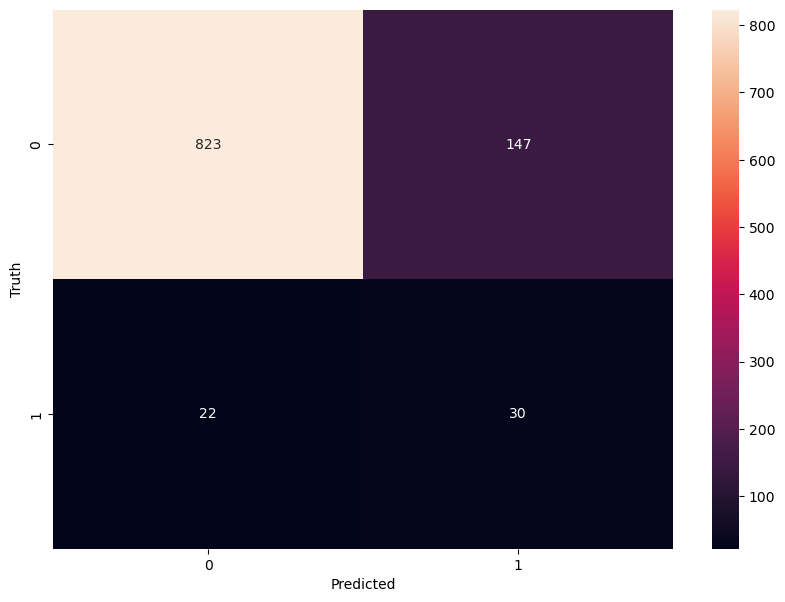

In [191]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [192]:
y_test.shape

(1022,)

In [193]:
round((823+30)/(823+22+147+30),2)

0.83

In [194]:
accuracy_score(y_pred, y_test)

0.8346379647749511